In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
import datetime

In [80]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [81]:
df = pd.read_excel( r'C:\Users\Pranjal singh\ML-CHE\210743_Pranjal Singh\Assignment3\AirQualityUCI.xlsx')

In [82]:
df.columns.values

array(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], dtype=object)

In [83]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [84]:
df.shape

(9357, 15)

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,-34.207524,77.657170,-200.0,0.600000,1.500000,2.600000,11.900000
PT08.S1(CO),9357.0,1048.869652,329.817015,-200.0,921.000000,1052.500000,1221.250000,2039.750000
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.000000,-200.000000,-200.000000,1189.000000
C6H6(GT),9357.0,1.865576,41.380154,-200.0,4.004958,7.886653,13.636091,63.741476
PT08.S2(NMHC),9357.0,894.475963,342.315902,-200.0,711.000000,894.500000,1104.750000,2214.000000
NOx(GT),9357.0,168.604200,257.424561,-200.0,50.000000,141.000000,284.200000,1479.000000
PT08.S3(NOx),9357.0,794.872333,321.977031,-200.0,637.000000,794.250000,960.250000,2682.750000
NO2(GT),9357.0,58.135898,126.931428,-200.0,53.000000,96.000000,133.000000,339.700000
PT08.S4(NO2),9357.0,1391.363266,467.192382,-200.0,1184.750000,1445.500000,1662.000000,2775.000000
PT08.S5(O3),9357.0,974.951534,456.922728,-200.0,699.750000,942.000000,1255.250000,2522.750000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [87]:
df.duplicated().sum()

0

In [88]:
df.replace(-200, np.nan, inplace=True)

In [89]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [90]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [91]:
df=df.drop('NMHC(GT)',axis=1,inplace=False)

In [92]:
df= df.dropna()

In [93]:
X=[]
for i in df['Time']:
    i = str(i)              
    Hour = (datetime.datetime.strptime(i,'%H:%M:%S')).hour
    X.append(Hour)
X = np.array(X)    
df['Hour']=X.T  
df['Date']=pd.to_datetime(df.Date, format='%m/%d/%Y')
df.set_index('Date',inplace=True)
df['Month']=df.index.month
df.reset_index(inplace=True)
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754,18,3
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487,19,3
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239,20,3
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713,21,3
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,2005-04-04,10:00:00,3.1,1314.25,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824,10,4
6937,2005-04-04,11:00:00,2.4,1162.50,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864,11,4
6938,2005-04-04,12:00:00,2.4,1142.00,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649,12,4
6939,2005-04-04,13:00:00,2.1,1002.50,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866,13,4


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6941 entries, 0 to 6940
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6941 non-null   datetime64[ns]
 1   Time           6941 non-null   object        
 2   CO(GT)         6941 non-null   float64       
 3   PT08.S1(CO)    6941 non-null   float64       
 4   C6H6(GT)       6941 non-null   float64       
 5   PT08.S2(NMHC)  6941 non-null   float64       
 6   NOx(GT)        6941 non-null   float64       
 7   PT08.S3(NOx)   6941 non-null   float64       
 8   NO2(GT)        6941 non-null   float64       
 9   PT08.S4(NO2)   6941 non-null   float64       
 10  PT08.S5(O3)    6941 non-null   float64       
 11  T              6941 non-null   float64       
 12  RH             6941 non-null   float64       
 13  AH             6941 non-null   float64       
 14  Hour           6941 non-null   int32         
 15  Month          6941 n

In [95]:
df.columns.values

array(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Hour', 'Month'],
      dtype=object)

In [96]:
df.AH.unique()

array([0.75775383, 0.72548745, 0.75023907, ..., 0.64064877, 0.51386592,
       0.50280371])

In [97]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Hour             0
Month            0
dtype: int64

<AxesSubplot:>

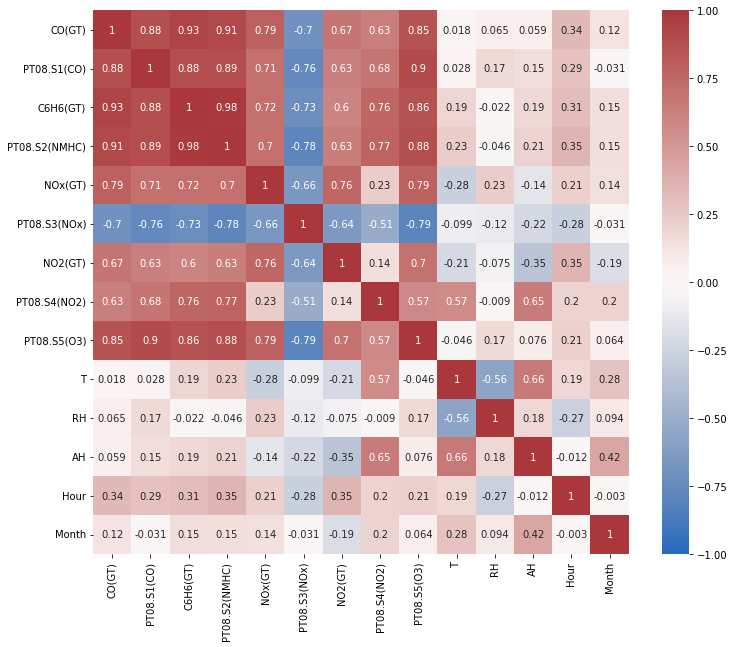

In [98]:
ax= plt.subplots(figsize=(12,10))
sb.heatmap(df.corr().round(3),annot=True,vmin=-1,vmax=1,cmap='vlag')  #heatmap of correlation matrix

In [101]:
interest_cols=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH','Hour','Month']
interest_df = df[interest_cols]

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
np_scaled = scaler.fit_transform(interest_df)
df_normalized = pd.DataFrame(np_scaled, columns = interest_cols)
df_normalized.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
0,0.289742,1.098254,0.177814,0.329799,-0.405853,0.950769,-0.018091,0.677866,0.516311,-0.469575,-0.000294,-0.568031,0.877653,-0.867536
1,-0.126620,0.788502,-0.155031,-0.013907,-0.707883,1.417263,-0.460557,0.300678,-0.210053,-0.503494,-0.067701,-0.648482,1.024422,-0.867536
2,0.012167,1.290277,-0.208529,-0.072612,-0.573647,1.283270,0.002979,0.288648,0.040269,-0.661779,0.292282,-0.586767,1.171191,-0.867536
3,0.012167,1.169120,-0.177586,-0.038525,-0.377088,1.092702,0.171538,0.371445,0.358245,-0.763534,0.637922,-0.495827,1.317960,-0.867536
4,-0.404195,0.697062,-0.540708,-0.465554,-0.573647,1.541331,0.045119,0.106069,0.128835,-0.746575,0.613541,-0.490636,1.464728,-0.867536


In [103]:
df_normalized.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
count,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03,6.941000e+03
mean,4.894202e-16,2.255955e-16,3.618342e-16,8.842116e-17,-2.348087e-16,-5.290874e-16,1.031591e-15,-4.302694e-18,-2.783955e-16,7.176062e-16,1.881669e-16,5.722423e-16,9.448332e-17,1.846288e-15
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-1.445099e+00,-2.160429e+00,-1.389604e+00,-2.151894e+00,-1.192088e+00,-1.964325e+00,-2.356839e+00,-2.551936e+00,-2.058254e+00,-2.222025e+00,-2.277793e+00,-1.996902e+00,-1.764187e+00,-1.440690e+00
25%,-7.511630e-01,-7.476853e-01,-7.538670e-01,-7.524500e-01,-7.078825e-01,-6.928798e-01,-7.344641e-01,-6.964274e-01,-7.334541e-01,-7.409222e-01,-7.776268e-01,-7.266833e-01,-7.368047e-01,-8.675355e-01
50%,-1.960138e-01,-1.601851e-01,-2.365995e-01,-1.038578e-01,-3.099708e-01,-1.241537e-01,-8.130012e-02,1.265709e-02,-1.264077e-01,-1.021260e-01,1.691658e-02,-7.894602e-02,-2.960329e-03,-7.803361e-03
75%,4.979227e-01,6.136235e-01,5.391620e-01,6.697186e-01,4.024351e-01,5.150430e-01,5.929336e-01,6.523900e-01,6.503902e-01,6.751703e-01,7.655657e-01,6.631766e-01,8.776530e-01,8.519288e-01
max,6.743351e+00,4.206061e+00,7.125209e+00,4.755376e+00,5.888824e+00,7.408243e+00,4.608838e+00,3.743489e+00,3.604436e+00,3.035325e+00,2.285811e+00,2.979710e+00,1.611497e+00,1.711661e+00


In [104]:
predictor2 = df_normalized.drop(['RH'],axis=1)
response2 = df_normalized['RH']

In [105]:
predictor2.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH',
       'Hour', 'Month'],
      dtype='object')

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(predictor2, response2, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(5552, 13) (5552,)
(1389, 13) (1389,)


# Model1

In [107]:
model1= Sequential()
model1.add(Dense(128, input_dim=13, activation='sigmoid'))
model1.add(Dense(54, activation='relu'))
model1.add(Dense(32, activation='tanh'))
model1.add(Dense(1))

In [108]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               1792      
                                                                 
 dense_41 (Dense)            (None, 54)                6966      
                                                                 
 dense_42 (Dense)            (None, 32)                1760      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 10,551
Trainable params: 10,551
Non-trainable params: 0
_________________________________________________________________


In [109]:
model1.compile(loss='MeanSquaredError', optimizer='adam')

In [110]:
history=model1.fit(X_train,Y_train, epochs=50, batch_size=100)

Epoch 1/50
56/56 [==============================] - 1s 2ms/step - loss: 0.7613
Epoch 2/50
56/56 [==============================] - 0s 2ms/step - loss: 0.1913
Epoch 3/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0765
Epoch 4/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 5/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0300
Epoch 6/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 7/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 8/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 9/50
56/56 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 10/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 11/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 12/50
56/56 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 13/50
56/56 [==============================

In [111]:
ans=model1.evaluate(X_test,Y_test)
print("loss :",ans)

44/44 [==============================] - 0s 1ms/step - loss: 0.0020
loss : 0.0019762746524065733


# Model2

In [112]:
model2= Sequential()
model2.add(Dense(64, input_dim=13, activation='linear'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='tanh'))
model2.add(Dense(1,activation='linear'))

In [113]:
model2.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [114]:
model2.fit(X_train,Y_train, epochs=50)

Epoch 1/50
174/174 [==============================] - 1s 1ms/step - loss: 0.1297
Epoch 2/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 3/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 4/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 5/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 6/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 7/50
174/174 [==============================] - 1s 3ms/step - loss: 0.0054
Epoch 8/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 9/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0042
Epoch 10/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0037
Epoch 11/50
174/174 [==============================] - 1s 6ms/step - loss: 0.0030
Epoch 12/50
174/174 [==============================] - 1s 6ms/step - loss: 0.0027
Epoch 13/50
174/174 [====

In [115]:
ans=model2.evaluate(X_test,Y_test)
print("loss :",ans)

44/44 [==============================] - 0s 1ms/step - loss: 5.4372e-04
loss : 0.0005437237559817731


# Model3

In [117]:
model3= Sequential()
model3.add(Dense(128, input_dim=13, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='tanh'))
model3.add(Dense(1,activation='linear'))

In [118]:
model3.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [119]:
model3.fit(X_train,Y_train, epochs=50)

Epoch 1/50
174/174 [==============================] - 1s 2ms/step - loss: 0.1339
Epoch 2/50
174/174 [==============================] - 1s 3ms/step - loss: 0.0137
Epoch 3/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 4/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 5/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 6/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 7/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 8/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 9/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 10/50
174/174 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 11/50
174/174 [==============================] - 1s 3ms/step - loss: 0.0024
Epoch 12/50
174/174 [==============================] - 1s 3ms/step - loss: 0.0025
Epoch 13/50
174/174 [====

In [120]:
ans=model3.evaluate(X_test,Y_test)
print("loss :",ans)

44/44 [==============================] - 0s 3ms/step - loss: 9.2205e-04
loss : 0.0009220460196956992


# Model4

In [121]:
model4= Sequential()
model4.add(Dense(256, input_dim=13, activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='tanh'))
model4.add(Dense(1,activation='linear'))

In [122]:
model4.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [123]:
model4.fit(X_train,Y_train, epochs=50)

Epoch 1/50
174/174 [==============================] - 2s 2ms/step - loss: 0.0824
Epoch 2/50
174/174 [==============================] - 1s 3ms/step - loss: 0.0083
Epoch 3/50
174/174 [==============================] - 1s 3ms/step - loss: 0.0061
Epoch 4/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 5/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 6/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 7/50
174/174 [==============================] - 1s 6ms/step - loss: 0.0034
Epoch 8/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0023
Epoch 9/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 10/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 11/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 12/50
174/174 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 13/50
174/174 [====

In [124]:
ans=model4.evaluate(X_test,Y_test)
print("loss :",ans)

44/44 [==============================] - 0s 2ms/step - loss: 3.5362e-04
loss : 0.0003536222211550921


# Model5


In [125]:
model5= Sequential()
model5.add(Dense(512, input_dim=13, activation='relu'))
model5.add(Dense(256, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(56, activation='relu'))
model5.add(Dense(32, activation='tanh'))
model5.add(Dense(1,activation='linear'))

In [126]:
model5.compile(optimizer='adam',
             loss=tf.keras.losses.mean_squared_error)

In [127]:
model5.fit(X_train,Y_train, epochs=50)

Epoch 1/50
174/174 [==============================] - 2s 4ms/step - loss: 0.0694
Epoch 2/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0095
Epoch 3/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 4/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0036
Epoch 5/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0044
Epoch 6/50
174/174 [==============================] - 1s 5ms/step - loss: 0.0033
Epoch 7/50
174/174 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 8/50
174/174 [==============================] - 1s 5ms/step - loss: 0.0025
Epoch 9/50
174/174 [==============================] - 1s 5ms/step - loss: 0.0018
Epoch 10/50
174/174 [==============================] - 1s 5ms/step - loss: 0.0026
Epoch 11/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 12/50
174/174 [==============================] - 1s 4ms/step - loss: 0.0015
Epoch 13/50
174/174 [====

In [128]:
ans=model5.evaluate(X_test,Y_test)
print("loss :",ans)

44/44 [==============================] - 0s 5ms/step - loss: 0.0021
loss : 0.002089323941618204


# Out of all 5 models, Model4 has minimum loss which is 0.0003536